In [ ]:
from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# importing the "tarfile" module
import tarfile
  
# open file
file = tarfile.open('/content/gdrive/MyDrive/lines.tgz')
  
# extracting file
file.extractall('./Destination')
  
file.close()


In [ ]:
# !sudo apt-get install tesseract-ocr
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
! pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import the necessary packages
from PIL import Image
import pytesseract
import argparse
import cv2
import os

img="/content/Destination/m06/m06-019/m06-019-00.png"
preprocess = "thresh"
# preprocess = "blur"

In [ ]:
# load the example image and convert it to grayscale
image = cv2.imread(img)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# check to see if we should apply thresholding to preprocess the
# image
if preprocess == "thresh":
	gray = cv2.threshold(gray, 0, 255,
		cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# make a check to see if median blurring should be done to remove
# noise
elif preprocess == "blur":
	gray = cv2.medianBlur(gray, 3)
# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

True

[peu gh your beth GS aud your SCAS are new,



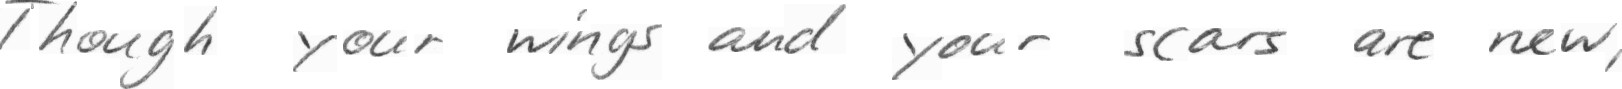

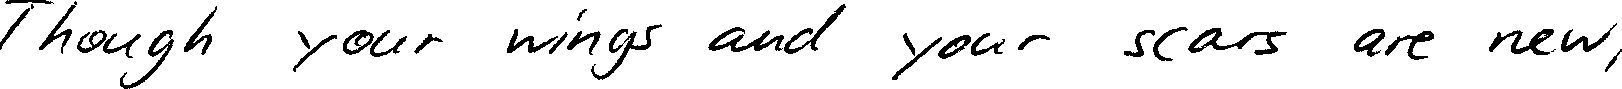

In [ ]:
from google.colab.patches import cv2_imshow
# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
text = pytesseract.image_to_string(Image.open(filename))
os.remove(filename)
print(text)
# show the output images
cv2_imshow(image)
cv2_imshow(gray)

In [ ]:
import json
    
# Data to be written
dictionary ={
    "username":"abdullahhabib86","key":"da2f205844771e60d393c8816cb1dc7d"
}
    
with open("kaggle.json", "w") as outfile:
    json.dump(dictionary, outfile)

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download landlord/handwriting-recognition -p /content/input/handwriting-recognition/ --unzip

100% 1.25G/1.26G [00:05<00:00, 196MB/s]
100% 1.26G/1.26G [00:05<00:00, 229MB/s]


In [ ]:
!kaggle datasets download vaibhao/handwritten-characters -p /content/gdrive/MyDrive/TableOCR/handwritten-characters/ --unzip

100% 1.62G/1.62G [01:23<00:00, 24.6MB/s]
100% 1.62G/1.62G [01:23<00:00, 20.8MB/s]
User cancelled operation


In [ ]:
!unzip /content/gdrive/MyDrive/TableOCR/handwritten-characters/handwritten-characters.zip -d /content/input/handwritten-characters/

In [ ]:
Expand-Archive -LiteralPath C:/Downloads/temp/handwritten-characters.zip -DestinationPath /Downloads/temp/handwritten-characters/
Get-ChildItem 'C:/Downloads/temp/handwritten-characters.zip' -Filter *.zip Expand-Archive -DestinationPath 'C:/Downloads/temp/handwritten-characters.zip' -Force

'Expand-Archive' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential,model_from_json
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
dir = "/content/input/handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [ ]:
len(train_data)

140000

In [ ]:
val_dir = "/content/input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [ ]:
len(val_data)

15209

In [ ]:
random.shuffle(train_data)
random.shuffle(val_data)

In [ ]:
train_X = []
train_Y = []
for image,label in train_data:
    train_X.append(image)
    train_Y.append(label)

In [ ]:
val_X = []
val_Y = []
for image,label in val_data:
    val_X.append(image)
    val_Y.append(label)
# print("train_y",train_Y)

print(set(val_Y))

{'U', 'A', '8', 'X', 'J', 'I', '2', 'E', '1', 'K', 'Y', '9', 'M', '4', 'Q', '7', '5', 'C', 'V', '6', 'W', 'P', 'R', '0', 'N', 'S', 'D', 'T', 'Z', 'F', 'L', 'G', 'H', '3', 'B'}


In [ ]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [ ]:
import pickle

# Save the LabelBinarizer
with open('label_binarizer.pickle', 'wb') as f:
    pickle.dump(LB, f)

<class 'list'>


In [ ]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [ ]:
print(train_X.shape)


(140000, 32, 32, 1)


In [ ]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [ ]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [ ]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [ ]:
# history = model.fit(train_X,train_Y, epochs=12, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)
history = model.fit(train_X,train_Y, epochs=30, batch_size=1000, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/30
140/140 [==============================] - 21s 36ms/step - loss: 1.4505 - accuracy: 0.5811 - val_loss: 0.5687 - val_accuracy: 0.8277
Epoch 2/30
140/140 [==============================] - 5s 34ms/step - loss: 0.5684 - accuracy: 0.8161 - val_loss: 0.3969 - val_accuracy: 0.8737
Epoch 3/30
140/140 [==============================] - 5s 37ms/step - loss: 0.4451 - accuracy: 0.8531 - val_loss: 0.3538 - val_accuracy: 0.8799
Epoch 4/30
140/140 [==============================] - 5s 37ms/step - loss: 0.3886 - accuracy: 0.8703 - val_loss: 0.3083 - val_accuracy: 0.9020
Epoch 5/30
140/140 [==============================] - 5s 34ms/step - loss: 0.3535 - accuracy: 0.8806 - val_loss: 0.2982 - val_accuracy: 0.9016
Epoch 6/30
140/140 [==============================] - 5s 33ms/step - loss: 0.3310 - accuracy: 0.8888 - val_loss: 0.2857 - val_accuracy: 0.9046
Epoch 7/30
140/140 [==============================] - 6s 42ms/step - loss: 0.3134 - accuracy: 0.8936 - val_loss: 0.2650 - val_accuracy: 0.908

In [ ]:
# Save the model
# model.save('my_model.h5')

from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
from pickle import dump
# save the scaler
dump(LB, open('LB.pkl', 'wb'))

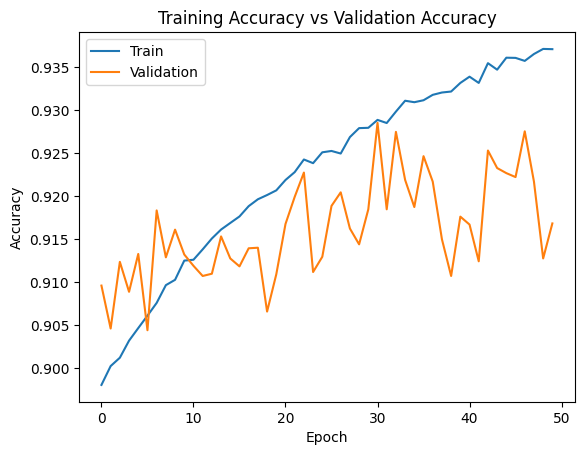

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.savefig('my_plot.png')

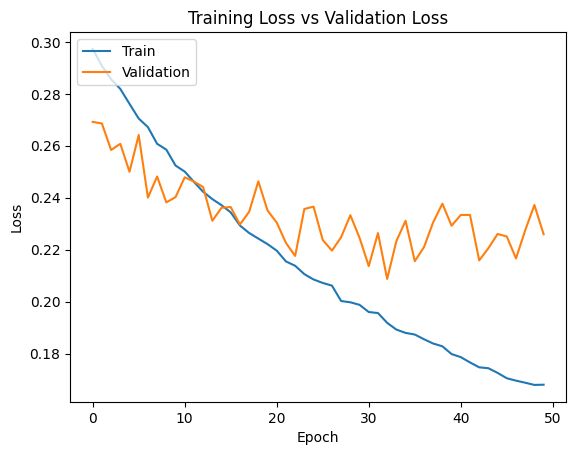

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

from keras.models import model_from_json
from keras.models import load_model

# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('/content/gdrive/MyDrive/TableOCR/model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# load weights into new model
model.load_weights("/content/gdrive/MyDrive/TableOCR/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
LB = LabelBinarizer()
val=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','P','Q','R','S','T','U','V','W','X','Y','Z']
val= LB.fit_transform(val)

In [ ]:
from keras.models import load_model

# Load the model
loaded_model = load_model('model.h5')
# Make predictions using the loaded model
loaded_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

predictions = loaded_model.predict(test_X)


In [ ]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [ ]:
##############original
##############
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        cv.imshow(thresh)
        return 
        # thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        # thresh = thresh.astype("float32") / 255.0
        # thresh = np.expand_dims(thresh, axis=-1)
        # thresh = thresh.reshape(1,32,32,1)
        # ypred = model.predict(thresh)
        # ypred = LB.inverse_transform(ypred)
        # [x] = ypred
        letters.append(x)
    return letters, image

In [ ]:
def get_letters(img):
    letters = []

    # graybill = cv2.imread(img,0)

    # # graybill = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # graybill[graybill <= 90] = 0
    # graybill[graybill > 110] = 255
    # img = cv2.bitwise_not(graybill)
        

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
      try:
        x=0
        y=0
        w=0
        h=0
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        roi = graybill[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
      except:
          letters.append("0") 
    return letters, image

#plt.imshow(image)

In [ ]:
def get_word(letter):
    word = "".join(letter)
    return word

# **test**

1/1 [==============================] - 0s 337ms/step
Z


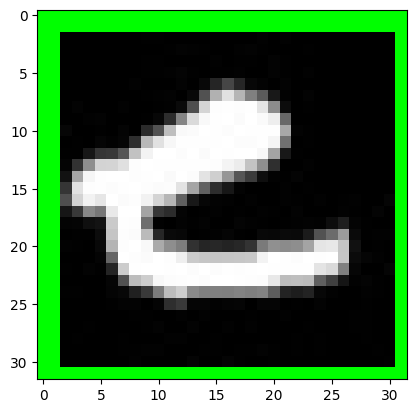

In [ ]:
# letter,image = get_letters("/content/input/handwriting-recognition/train_v2/train/TRAIN_00003.jpg")
letter,image = get_letters("/content/__results___34_11.png")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 21ms/step
LIL0U


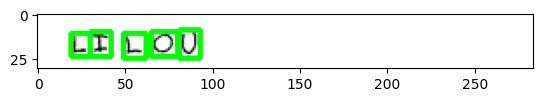

In [ ]:
letter,image = get_letters("/content/input/handwriting-recognition/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 21ms/step
7AFFFUX


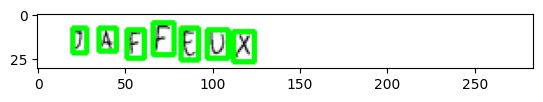

In [ ]:
letter,image = get_letters("/content/input/handwriting-recognition/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 21ms/step
RUPP


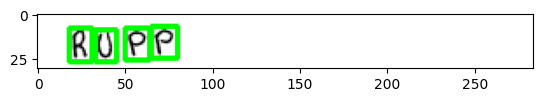

In [ ]:
letter,image = get_letters("/content/input/handwriting-recognition/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 17ms/step
VALENTJNF


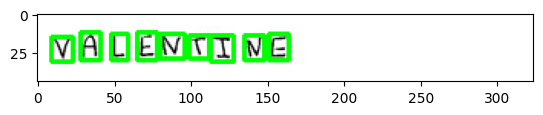

In [ ]:
letter,image = get_letters("/content/input/handwriting-recognition/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

# **table breaker**

In [ ]:
####################################################################################################
# importing useful libs
####################################################################################################
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import hypot, pi, cos, sin
import numpy as np
import cv2 as cv

####################################################################################################
# define function that used to show the images using plt lib (if needed)
####################################################################################################
def showImg(img):
    temp = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    testimageplot = plt.imshow(temp,'gray')
    return temp

####################################################################################################
# define the pre_processing function 
#   - it takes input image and return no. of cols and rows and image cells
####################################################################################################

##########################################################################################
def pre_processing (img):
# ####################################################################################################
# # 1-Apply gaussian blurring to reduce noise
# # 2-convert image to grayscale and apply hough transform on it
# # 3-convert hough output to :
# #         - vlines array that contain vertical lines
# #         - hlines array that contain horizontal lines 
# ####################################################################################################
    vlines = []
    hlines = []

    blur = cv.GaussianBlur(img,(3,3),0)
    gray = cv.cvtColor(blur,cv.COLOR_BGR2GRAY)
    edges = cv.Canny(gray,25,150,apertureSize = 3)
    lines = cv.HoughLines(edges,1,pi/180,100)
    for i in range(len(lines)):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 375*(-b))
            y1 = int(y0 + 375*(a))
            x2 = int(x0 - 500*(-b))
            y2 = int(y0 - 500*(a))
        if(-70 <= (x1-x2) <= 70):
            vlines.append([x1,y1,x2,y2])

        if(-70 <= (y1-y2) <= 70):
            hlines.append([x1,y1,x2,y2])

                       
# ####################################################################################################
# # remove duplication from vlines array (some of vlines in the table detected by more than one line)
# ####################################################################################################                
    dup = []
    for i in range(len(vlines)) :
        for j in range(len(vlines)):
            if i >= j :
                continue
            if  ((-15 <= vlines[i][0]-vlines[j][0] <= 15 ) or (-15 <= vlines[i][2]-vlines[j][2] <= 15 )):
                dup.append(j)
            
    dup.sort()
    dup = list(set(dup))
    for i in range(len(dup)):
        vlines.pop(dup[i]-i)
               
# #################################################################################################### 
# # remove duplication from hlines array (some of hlines in the table detected by more than one line)
# ####################################################################################################     
    hdup = []  
    for i in range(len(hlines)) :
        for j in range(len(hlines)):
            if i >= j :
                continue
            if ((-15 <= (hlines[i][3]-hlines[j][3]) <= 15 ) or (-15 <= (hlines[i][1]-hlines[j][1]) <= 15 )):
                hdup.append(j)       
    hdup.sort()
    hdup = list(set(hdup))
    for i in range(len(hdup)):
        z = hdup[i]-i
        hlines.pop(z) ,z , len(hlines)

# #################################################################################################### 
# # sort vlines and hlines w.r.t. x1 and y1 respectively
# #################################################################################################### 
    vlines_x1s = [ line[0] for line in vlines ]
    vlines = [line for x1, line in sorted(zip(vlines_x1s, vlines)) ]

    hlines_y1s = [ line[1] for line in hlines ]
    hlines = [line for y1, line in sorted(zip(hlines_y1s, hlines))]
# #################################################################################################### 
# # Raise an exception if there is no tables in the input image detected
# ####################################################################################################     
    n_cols = len(vlines) - 1
    n_rows = len(hlines) - 1
    if (n_cols == 0) or (n_rows == 0) :
        raise Exception('There is no tables can be found')
# #################################################################################################### 
# # get the intersection points
# #################################################################################################### 
    eps = 1e-10
    inter_pts = []
    for h in hlines:
        for v in vlines:
            x_h1, y_h1, x_h2, y_h2 = h
            x_v1, y_v1, x_v2, y_v2 = v
        
            m_h = (y_h2 - y_h1) / (x_h2 - x_h1)
            c_h = y_h1 - m_h * x_h1
        
            m_v = (y_v2 - y_v1) / (x_v2 - x_v1 + eps)
            c_v = y_v1 - m_v * x_v1
        
            x_inter = int((c_v - c_h) / (m_h - m_v + eps))
            y_inter = int(m_h * x_inter + c_h)
        
            inter_pts.append( (x_inter, y_inter) )
# #################################################################################################### 
# # 1- segmentation :
# #     using vlines & hlines & inter_pts (intersection points) arrays we can detect cells in the table and saving each cell as separeted image 
# # 2- return no. of columns and rows oof the original table
# #################################################################################################### 

    cells = []
    max_cell_width = -1
    max_cell_height = -1
    for i in range(n_cols * n_rows):
        # offset w.r.t. to the cell row
        offset = i // n_cols
        start = i + offset
        cell_coords = [ inter_pts[start], inter_pts[start + 1], inter_pts[start + n_cols + 1], inter_pts[start + n_cols + 2] ]
        cells.append(cell_coords)
        y1 = cell_coords[0][1] + 4
        y2 = cell_coords[2][1] - 4
        x1 = cell_coords[0][0] + 4
        x2 = cell_coords[1][0] - 4
        cell_array = img[y1:y2, x1:x2, :]
        cv.imwrite('{}.png'.format(i), cell_array)
    return (n_cols,n_rows)


# **debugging**

In [ ]:
img = cv.imread("/content/1.jpg")
x,y=pre_processing(img)

table_list=[]
for i in range(x*y):
      letter,image = get_letters('/content/{}.png'.format(i))
      word = get_word(letter)
      print(word)
      table_list.append(word)

####combining results from each image to a dataframe
import pandas as pd
arr=np.array(table_list)
arr = arr.reshape(y, x)
df = pd.DataFrame(arr)
df.to_csv("data.csv")

error: ignored

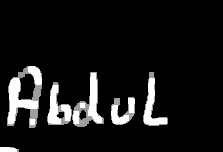

In [ ]:
from google.colab.patches import cv2_imshow
graybill = cv2.imread('/content/0.png',0)

# graybill = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
graybill[graybill <= 90] = 0
graybill[graybill > 110] = 255
img = cv2.bitwise_not(graybill)

dilated = cv2.dilate(img, None, iterations=2)

cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

cv2_imshow(dilated)

# **Words recognition comp code**

In [ ]:
# importing the "tarfile" module
from google.colab import drive

drive.mount('/content/gdrive')
import tarfile
  
# open file
file = tarfile.open('/content/gdrive/MyDrive/words.tgz')
  
# extracting file
file.extractall('./Destination')
  
file.close()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FileNotFoundError: ignored

In [ ]:
!pip install lmdb
!pip install path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 6.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **lmdb**

In [ ]:
import argparse
import pickle

import cv2
import lmdb
from path import Path

# parser = argparse.ArgumentParser()
# parser.add_argument('--data_dir', type=Path, required=True)
# args = parser.parse_args()

# 2GB is enough for IAM dataset
data_dir=Path("/content")
assert not (data_dir / 'lmdb').exists()
env = lmdb.open(str(data_dir / 'lmdb'), map_size=1024 * 1024 * 1024 * 2, lock=False)

# go over all png files
fn_imgs = list((data_dir / 'Destination').walkfiles('*.png'))

# and put the imgs into lmdb as pickled grayscale imgs
with env.begin(write=True) as txn:
    for i, fn_img in enumerate(fn_imgs):
        print(i, len(fn_imgs))
        img = cv2.imread(fn_img, cv2.IMREAD_GRAYSCALE)
        basename = fn_img.basename()
        txn.put(basename.encode("ascii"), pickle.dumps(img))

env.close()


Streaming output truncated to the last 5000 lines.
110320 115320
110321 115320
110322 115320
110323 115320
110324 115320
110325 115320
110326 115320
110327 115320
110328 115320
110329 115320
110330 115320
110331 115320
110332 115320
110333 115320
110334 115320
110335 115320
110336 115320
110337 115320
110338 115320
110339 115320
110340 115320
110341 115320
110342 115320
110343 115320
110344 115320
110345 115320
110346 115320
110347 115320
110348 115320
110349 115320
110350 115320
110351 115320
110352 115320
110353 115320
110354 115320
110355 115320
110356 115320
110357 115320
110358 115320
110359 115320
110360 115320
110361 115320
110362 115320
110363 115320
110364 115320
110365 115320
110366 115320
110367 115320
110368 115320
110369 115320
110370 115320
110371 115320
110372 115320
110373 115320
110374 115320
110375 115320
110376 115320
110377 115320
110378 115320
110379 115320
110380 115320
110381 115320
110382 115320
110383 115320
110384 115320
110385 115320
110386 115320
110387 1153

# **Data loader**

In [ ]:

import pickle
import random
from collections import namedtuple
from typing import Tuple

import cv2
import lmdb
import numpy as np
from path import Path

Sample = namedtuple('Sample', 'gt_text, file_path')
Batch = namedtuple('Batch', 'imgs, gt_texts, batch_size')


class DataLoaderIAM:
    """
    Loads data which corresponds to IAM format,
    see: http://www.fki.inf.unibe.ch/databases/iam-handwriting-database
    """

    def __init__(self,data_dir: Path,batch_size: int,data_split: float = 0.95,fast: bool = True) -> None:
        """Loader for dataset."""

        assert data_dir.exists()

        self.fast = fast
        if fast:
            self.env = lmdb.open(str(Path('/content') / 'lmdb'), readonly=True)

        self.data_augmentation = False
        self.curr_idx = 0
        self.batch_size = batch_size
        self.samples = []

        f = open('/content/gdrive/MyDrive/words.txt')
        chars = set()
        bad_samples_reference = ['a01-117-05-02', 'r06-022-03-05']  # known broken images in IAM dataset
        for line in f:
            # ignore empty and comment lines
            line = line.strip()
            if not line or line[0] == '#':
                continue

            line_split = line.split(' ')
            assert len(line_split) >= 9

            # filename: part1-part2-part3 --> part1/part1-part2/part1-part2-part3.png
            file_name_split = line_split[0].split('-')
            file_name_subdir1 = file_name_split[0]
            file_name_subdir2 = f'{file_name_split[0]}-{file_name_split[1]}'
            file_base_name = line_split[0] + '.png'
            file_name = data_dir / 'img' / file_name_subdir1 / file_name_subdir2 / file_base_name

            if line_split[0] in bad_samples_reference:
                print('Ignoring known broken image:', file_name)
                continue

            # GT text are columns starting at 9
            gt_text = ' '.join(line_split[8:])
            chars = chars.union(set(list(gt_text)))

            # put sample into list
            self.samples.append(Sample(gt_text, file_name))

        # split into training and validation set: 95% - 5%
        split_idx = int(data_split * len(self.samples))
        self.train_samples = self.samples[:split_idx]
        self.validation_samples = self.samples[split_idx:]

        # put words into lists
        self.train_words = [x.gt_text for x in self.train_samples]
        self.validation_words = [x.gt_text for x in self.validation_samples]

        # start with train set
        self.train_set()

        # list of all chars in dataset
        self.char_list = sorted(list(chars))

    def train_set(self) -> None:
        """Switch to randomly chosen subset of training set."""
        self.data_augmentation = True
        self.curr_idx = 0
        random.shuffle(self.train_samples)
        self.samples = self.train_samples
        self.curr_set = 'train'

    def validation_set(self) -> None:
        """Switch to validation set."""
        self.data_augmentation = False
        self.curr_idx = 0
        self.samples = self.validation_samples
        self.curr_set = 'val'

    def get_iterator_info(self) -> Tuple[int, int]:
        """Current batch index and overall number of batches."""
        if self.curr_set == 'train':
            num_batches = int(np.floor(len(self.samples) / self.batch_size))  # train set: only full-sized batches
        else:
            num_batches = int(np.ceil(len(self.samples) / self.batch_size))  # val set: allow last batch to be smaller
        curr_batch = self.curr_idx // self.batch_size + 1
        return curr_batch, num_batches

    def has_next(self) -> bool:
        """Is there a next element?"""
        if self.curr_set == 'train':
            return self.curr_idx + self.batch_size <= len(self.samples)  # train set: only full-sized batches
        else:
            return self.curr_idx < len(self.samples)  # val set: allow last batch to be smaller

    def _get_img(self, i: int) -> np.ndarray:
        if self.fast:
            with self.env.begin() as txn:
                basename = Path(self.samples[i].file_path).basename()
                data = txn.get(basename.encode("ascii"))
                img = pickle.loads(data)
        else:
            img = cv2.imread(self.samples[i].file_path, cv2.IMREAD_GRAYSCALE)

        return img

    def get_next(self) -> Batch:
        """Get next element."""
        batch_range = range(self.curr_idx, min(self.curr_idx + self.batch_size, len(self.samples)))

        imgs = [self._get_img(i) for i in batch_range]
        gt_texts = [self.samples[i].gt_text for i in batch_range]

        self.curr_idx += self.batch_size
        return Batch(imgs, gt_texts, len(imgs))

# **Preprocessing**

In [ ]:
import random
from typing import Tuple

import cv2
import numpy as np


class Preprocessor:
    def __init__(self,
                 img_size: Tuple[int, int],
                 padding: int = 0,
                 dynamic_width: bool = False,
                 data_augmentation: bool = False,
                 line_mode: bool = False) -> None:
        # dynamic width only supported when no data augmentation happens
        assert not (dynamic_width and data_augmentation)
        # when padding is on, we need dynamic width enabled
        assert not (padding > 0 and not dynamic_width)

        self.img_size = img_size
        self.padding = padding
        self.dynamic_width = dynamic_width
        self.data_augmentation = data_augmentation
        self.line_mode = line_mode

    @staticmethod
    def _truncate_label(text: str, max_text_len: int) -> str:
        """
        Function ctc_loss can't compute loss if it cannot find a mapping between text label and input
        labels. Repeat letters cost double because of the blank symbol needing to be inserted.
        If a too-long label is provided, ctc_loss returns an infinite gradient.
        """
        cost = 0
        for i in range(len(text)):
            if i != 0 and text[i] == text[i - 1]:
                cost += 2
            else:
                cost += 1
            if cost > max_text_len:
                return text[:i]
        return text

    def _simulate_text_line(self, batch: Batch) -> Batch:
        """Create image of a text line by pasting multiple word images into an image."""

        default_word_sep = 30
        default_num_words = 5

        # go over all batch elements
        res_imgs = []
        res_gt_texts = []
        for i in range(batch.batch_size):
            # number of words to put into current line
            num_words = random.randint(1, 8) if self.data_augmentation else default_num_words

            # concat ground truth texts
            curr_gt = ' '.join([batch.gt_texts[(i + j) % batch.batch_size] for j in range(num_words)])
            res_gt_texts.append(curr_gt)

            # put selected word images into list, compute target image size
            sel_imgs = []
            word_seps = [0]
            h = 0
            w = 0
            for j in range(num_words):
                curr_sel_img = batch.imgs[(i + j) % batch.batch_size]
                curr_word_sep = random.randint(20, 50) if self.data_augmentation else default_word_sep
                h = max(h, curr_sel_img.shape[0])
                w += curr_sel_img.shape[1]
                sel_imgs.append(curr_sel_img)
                if j + 1 < num_words:
                    w += curr_word_sep
                    word_seps.append(curr_word_sep)

            # put all selected word images into target image
            target = np.ones([h, w], np.uint8) * 255
            x = 0
            for curr_sel_img, curr_word_sep in zip(sel_imgs, word_seps):
                x += curr_word_sep
                y = (h - curr_sel_img.shape[0]) // 2
                target[y:y + curr_sel_img.shape[0]:, x:x + curr_sel_img.shape[1]] = curr_sel_img
                x += curr_sel_img.shape[1]

            # put image of line into result
            res_imgs.append(target)

        return Batch(res_imgs, res_gt_texts, batch.batch_size)

    def process_img(self, img: np.ndarray) -> np.ndarray:
        """Resize to target size, apply data augmentation."""

        # there are damaged files in IAM dataset - just use black image instead
        if img is None:
            img = np.zeros(self.img_size[::-1])

        # data augmentation
        # img = img.astype(np.float)
        img = img.astype(float)
        
        if self.data_augmentation:
            # photometric data augmentation
            if random.random() < 0.25:
                def rand_odd():
                    return random.randint(1, 3) * 2 + 1
                img = cv2.GaussianBlur(img, (rand_odd(), rand_odd()), 0)
            if random.random() < 0.25:
                img = cv2.dilate(img, np.ones((3, 3)))
            if random.random() < 0.25:
                img = cv2.erode(img, np.ones((3, 3)))

            # geometric data augmentation
            wt, ht = self.img_size
            h, w = img.shape
            f = min(wt / w, ht / h)
            fx = f * np.random.uniform(0.75, 1.05)
            fy = f * np.random.uniform(0.75, 1.05)

            # random position around center
            txc = (wt - w * fx) / 2
            tyc = (ht - h * fy) / 2
            freedom_x = max((wt - fx * w) / 2, 0)
            freedom_y = max((ht - fy * h) / 2, 0)
            tx = txc + np.random.uniform(-freedom_x, freedom_x)
            ty = tyc + np.random.uniform(-freedom_y, freedom_y)

            # map image into target image
            M = np.float32([[fx, 0, tx], [0, fy, ty]])
            target = np.ones(self.img_size[::-1]) * 255
            img = cv2.warpAffine(img, M, dsize=self.img_size, dst=target, borderMode=cv2.BORDER_TRANSPARENT)

            # photometric data augmentation
            if random.random() < 0.5:
                img = img * (0.25 + random.random() * 0.75)
            if random.random() < 0.25:
                img = np.clip(img + (np.random.random(img.shape) - 0.5) * random.randint(1, 25), 0, 255)
            if random.random() < 0.1:
                img = 255 - img

        # no data augmentation
        else:
            if self.dynamic_width:
                ht = self.img_size[1]
                h, w = img.shape
                f = ht / h
                wt = int(f * w + self.padding)
                wt = wt + (4 - wt) % 4
                tx = (wt - w * f) / 2
                ty = 0
            else:
                wt, ht = self.img_size
                h, w = img.shape
                f = min(wt / w, ht / h)
                tx = (wt - w * f) / 2
                ty = (ht - h * f) / 2

            # map image into target image
            M = np.float32([[f, 0, tx], [0, f, ty]])
            target = np.ones([ht, wt]) * 255
            img = cv2.warpAffine(img, M, dsize=(wt, ht), dst=target, borderMode=cv2.BORDER_TRANSPARENT)

        # transpose for TF
        img = cv2.transpose(img)

        # convert to range [-1, 1]
        img = img / 255 - 0.5
        return img

    def process_batch(self, batch: Batch) -> Batch:
        if self.line_mode:
            batch = self._simulate_text_line(batch)

        res_imgs = [self.process_img(img) for img in batch.imgs]
        max_text_len = res_imgs[0].shape[0] // 4
        res_gt_texts = [self._truncate_label(gt_text, max_text_len) for gt_text in batch.gt_texts]
        return Batch(res_imgs, res_gt_texts, batch.batch_size)


def main():
    import matplotlib.pyplot as plt

    img = cv2.imread('/content/Destination/a04/a04-000/a04-000-00-02.png', cv2.IMREAD_GRAYSCALE)
    img_aug = Preprocessor((256, 32), data_augmentation=True).process_img(img)
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.subplot(122)
    plt.imshow(cv2.transpose(img_aug) + 0.5, cmap='gray', vmin=0, vmax=1)
    plt.show()


# if __name__ == '__main__':
#     main()

# **MODEL**

In [ ]:


import os
import sys
from typing import List, Tuple

import numpy as np
import tensorflow as tf

# Disable eager mode
tf.compat.v1.disable_eager_execution()


class DecoderType:
    """CTC decoder types."""
    BestPath = 0
    BeamSearch = 1
    WordBeamSearch = 2


class Model:
    """Minimalistic TF model for HTR."""

    def __init__(self,
                 char_list: List[str],
                 decoder_type: str = DecoderType.BestPath,
                 must_restore: bool = False,
                 dump: bool = False) -> None:
        """Init model: add CNN, RNN and CTC and initialize TF."""
        self.dump = dump
        self.char_list = char_list
        self.decoder_type = decoder_type
        self.must_restore = must_restore
        self.snap_ID = 0

        # Whether to use normalization over a batch or a population
        self.is_train = tf.compat.v1.placeholder(tf.bool, name='is_train')

        # input image batch
        self.input_imgs = tf.compat.v1.placeholder(tf.float32, shape=(None, None, None))

        # setup CNN, RNN and CTC
        self.setup_cnn()
        self.setup_rnn()
        self.setup_ctc()

        # setup optimizer to train NN
        self.batches_trained = 0
        self.update_ops = tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(self.update_ops):
            self.optimizer = tf.compat.v1.train.AdamOptimizer().minimize(self.loss)

        # initialize TF
        self.sess, self.saver = self.setup_tf()

    def setup_cnn(self) -> None:
        """Create CNN layers."""
        cnn_in4d = tf.expand_dims(input=self.input_imgs, axis=3)

        # list of parameters for the layers
        kernel_vals = [5, 5, 3, 3, 3]
        feature_vals = [1, 32, 64, 128, 128, 256]
        stride_vals = pool_vals = [(2, 2), (2, 2), (1, 2), (1, 2), (1, 2)]
        num_layers = len(stride_vals)

        # create layers
        pool = cnn_in4d  # input to first CNN layer
        for i in range(num_layers):
            kernel = tf.Variable(
                tf.random.truncated_normal([kernel_vals[i], kernel_vals[i], feature_vals[i], feature_vals[i + 1]],
                                           stddev=0.1))
            conv = tf.nn.conv2d(input=pool, filters=kernel, padding='SAME', strides=(1, 1, 1, 1))
            conv_norm = tf.compat.v1.layers.batch_normalization(conv, training=self.is_train)
            # conv_norm = tf.keras.layers.BatchNormalization()(conv, training=self.is_train)
            relu = tf.nn.relu(conv_norm)
            pool = tf.nn.max_pool2d(input=relu, ksize=(1, pool_vals[i][0], pool_vals[i][1], 1),
                                    strides=(1, stride_vals[i][0], stride_vals[i][1], 1), padding='VALID')

        self.cnn_out_4d = pool

    def setup_rnn(self) -> None:
        """Create RNN layers."""
        rnn_in3d = tf.squeeze(self.cnn_out_4d, axis=[2])

        # basic cells which is used to build RNN
        num_hidden = 256
        cells = [tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=num_hidden, state_is_tuple=True) for _ in
                 range(2)]  # 2 layers

        # stack basic cells
        stacked = tf.compat.v1.nn.rnn_cell.MultiRNNCell(cells, state_is_tuple=True)

        # bidirectional RNN
        # BxTxF -> BxTx2H
        (fw, bw), _ = tf.compat.v1.nn.bidirectional_dynamic_rnn(cell_fw=stacked, cell_bw=stacked, inputs=rnn_in3d,
                                                                dtype=rnn_in3d.dtype)

        # BxTxH + BxTxH -> BxTx2H -> BxTx1X2H
        concat = tf.expand_dims(tf.concat([fw, bw], 2), 2)

        # project output to chars (including blank): BxTx1x2H -> BxTx1xC -> BxTxC
        kernel = tf.Variable(tf.random.truncated_normal([1, 1, num_hidden * 2, len(self.char_list) + 1], stddev=0.1))
        self.rnn_out_3d = tf.squeeze(tf.nn.atrous_conv2d(value=concat, filters=kernel, rate=1, padding='SAME'),
                                     axis=[2])

    def setup_ctc(self) -> None:
        """Create CTC loss and decoder."""
        # BxTxC -> TxBxC
        self.ctc_in_3d_tbc = tf.transpose(a=self.rnn_out_3d, perm=[1, 0, 2])
        # ground truth text as sparse tensor
        self.gt_texts = tf.SparseTensor(tf.compat.v1.placeholder(tf.int64, shape=[None, 2]),
                                        tf.compat.v1.placeholder(tf.int32, [None]),
                                        tf.compat.v1.placeholder(tf.int64, [2]))

        # calc loss for batch
        self.seq_len = tf.compat.v1.placeholder(tf.int32, [None])
        self.loss = tf.reduce_mean(
            input_tensor=tf.compat.v1.nn.ctc_loss(labels=self.gt_texts, inputs=self.ctc_in_3d_tbc,
                                                  sequence_length=self.seq_len,
                                                  ctc_merge_repeated=True))

        # calc loss for each element to compute label probability
        self.saved_ctc_input = tf.compat.v1.placeholder(tf.float32,
                                                        shape=[None, None, len(self.char_list) + 1])
        self.loss_per_element = tf.compat.v1.nn.ctc_loss(labels=self.gt_texts, inputs=self.saved_ctc_input,
                                                         sequence_length=self.seq_len, ctc_merge_repeated=True)

        # best path decoding or beam search decoding
        if self.decoder_type == DecoderType.BestPath:
            self.decoder = tf.nn.ctc_greedy_decoder(inputs=self.ctc_in_3d_tbc, sequence_length=self.seq_len)
        elif self.decoder_type == DecoderType.BeamSearch:
            self.decoder = tf.nn.ctc_beam_search_decoder(inputs=self.ctc_in_3d_tbc, sequence_length=self.seq_len,
                                                         beam_width=50)
        # word beam search decoding (see https://github.com/githubharald/CTCWordBeamSearch)
        elif self.decoder_type == DecoderType.WordBeamSearch:
            # prepare information about language (dictionary, characters in dataset, characters forming words)
            chars = ''.join(self.char_list)
            word_chars = open('/content/gdrive/MyDrive/wordCharList.txt').read().splitlines()[0]
            corpus = open('/content/gdrive/MyDrive/corpus.txt').read()

            # decode using the "Words" mode of word beam search
            from word_beam_search import WordBeamSearch
            self.decoder = WordBeamSearch(50, 'Words', 0.0, corpus.encode('utf8'), chars.encode('utf8'),
                                          word_chars.encode('utf8'))

            # the input to the decoder must have softmax already applied
            self.wbs_input = tf.nn.softmax(self.ctc_in_3d_tbc, axis=2)

    def setup_tf(self) -> Tuple[tf.compat.v1.Session, tf.compat.v1.train.Saver]:
        """Initialize TF."""
        print('Python: ' + sys.version)
        print('Tensorflow: ' + tf.__version__)

        sess = tf.compat.v1.Session()  # TF session

        saver = tf.compat.v1.train.Saver(max_to_keep=1)  # saver saves model to file
        model_dir = '/content/model/'
        latest_snapshot = tf.train.latest_checkpoint(model_dir)  # is there a saved model?

        # if model must be restored (for inference), there must be a snapshot
        if self.must_restore and not latest_snapshot:
            raise Exception('No saved model found in: ' + model_dir)

        # load saved model if available
        if latest_snapshot:
            print('Init with stored values from ' + latest_snapshot)
            saver.restore(sess, latest_snapshot)
        else:
            print('Init with new values')
            sess.run(tf.compat.v1.global_variables_initializer())

        return sess, saver

    def to_sparse(self, texts: List[str]) -> Tuple[List[List[int]], List[int], List[int]]:
        """Put ground truth texts into sparse tensor for ctc_loss."""
        indices = []
        values = []
        shape = [len(texts), 0]  # last entry must be max(labelList[i])

        # go over all texts
        for batchElement, text in enumerate(texts):
            # convert to string of label (i.e. class-ids)
            label_str = [self.char_list.index(c) for c in text]
            # sparse tensor must have size of max. label-string
            if len(label_str) > shape[1]:
                shape[1] = len(label_str)
            # put each label into sparse tensor
            for i, label in enumerate(label_str):
                indices.append([batchElement, i])
                values.append(label)

        return indices, values, shape

    def decoder_output_to_text(self, ctc_output: tuple, batch_size: int) -> List[str]:
        """Extract texts from output of CTC decoder."""

        # word beam search: already contains label strings
        if self.decoder_type == DecoderType.WordBeamSearch:
            label_strs = ctc_output

        # TF decoders: label strings are contained in sparse tensor
        else:
            # ctc returns tuple, first element is SparseTensor
            decoded = ctc_output[0][0]

            # contains string of labels for each batch element
            label_strs = [[] for _ in range(batch_size)]

            # go over all indices and save mapping: batch -> values
            for (idx, idx2d) in enumerate(decoded.indices):
                label = decoded.values[idx]
                batch_element = idx2d[0]  # index according to [b,t]
                label_strs[batch_element].append(label)

        # map labels to chars for all batch elements
        return [''.join([self.char_list[c] for c in labelStr]) for labelStr in label_strs]

    def train_batch(self, batch: Batch) -> float:
        """Feed a batch into the NN to train it."""
        num_batch_elements = len(batch.imgs)
        max_text_len = batch.imgs[0].shape[0] // 4
        sparse = self.to_sparse(batch.gt_texts)
        eval_list = [self.optimizer, self.loss]
        feed_dict = {self.input_imgs: batch.imgs, self.gt_texts: sparse,
                     self.seq_len: [max_text_len] * num_batch_elements, self.is_train: True}
        _, loss_val = self.sess.run(eval_list, feed_dict)
        self.batches_trained += 1
        return loss_val

    @staticmethod
    def dump_nn_output(rnn_output: np.ndarray) -> None:
        """Dump the output of the NN to CSV file(s)."""
        dump_dir = '/content/dump/'
        if not os.path.isdir(dump_dir):
            os.mkdir(dump_dir)

        # iterate over all batch elements and create a CSV file for each one
        max_t, max_b, max_c = rnn_output.shape
        for b in range(max_b):
            csv = ''
            for t in range(max_t):
                for c in range(max_c):
                    csv += str(rnn_output[t, b, c]) + ';'
                csv += '\n'
            fn = dump_dir + 'rnnOutput_' + str(b) + '.csv'
            print('Write dump of NN to file: ' + fn)
            with open(fn, 'w') as f:
                f.write(csv)

    def infer_batch(self, batch: Batch, calc_probability: bool = False, probability_of_gt: bool = False):
        """Feed a batch into the NN to recognize the texts."""

        # decode, optionally save RNN output
        num_batch_elements = len(batch.imgs)

        # put tensors to be evaluated into list
        eval_list = []

        if self.decoder_type == DecoderType.WordBeamSearch:
            eval_list.append(self.wbs_input)
        else:
            eval_list.append(self.decoder)

        if self.dump or calc_probability:
            eval_list.append(self.ctc_in_3d_tbc)

        # sequence length depends on input image size (model downsizes width by 4)
        max_text_len = batch.imgs[0].shape[0] // 4

        # dict containing all tensor fed into the model
        feed_dict = {self.input_imgs: batch.imgs, self.seq_len: [max_text_len] * num_batch_elements,
                     self.is_train: False}

        # evaluate model
        eval_res = self.sess.run(eval_list, feed_dict)

        # TF decoders: decoding already done in TF graph
        if self.decoder_type != DecoderType.WordBeamSearch:
            decoded = eval_res[0]
        # word beam search decoder: decoding is done in C++ function compute()
        else:
            decoded = self.decoder.compute(eval_res[0])

        # map labels (numbers) to character string
        texts = self.decoder_output_to_text(decoded, num_batch_elements)

        # feed RNN output and recognized text into CTC loss to compute labeling probability
        probs = None
        if calc_probability:
            sparse = self.to_sparse(batch.gt_texts) if probability_of_gt else self.to_sparse(texts)
            ctc_input = eval_res[1]
            eval_list = self.loss_per_element
            feed_dict = {self.saved_ctc_input: ctc_input, self.gt_texts: sparse,
                         self.seq_len: [max_text_len] * num_batch_elements, self.is_train: False}
            loss_vals = self.sess.run(eval_list, feed_dict)
            probs = np.exp(-loss_vals)

        # dump the output of the NN to CSV file(s)
        if self.dump:
            self.dump_nn_output(eval_res[1])

        return texts, probs

    def save(self) -> None:
        """Save model to file."""
        self.snap_ID += 1
        self.saver.save(self.sess, '/content/model/snapshot', global_step=self.snap_ID)

# **MAIN**

In [ ]:
import argparse
import json
from typing import Tuple, List

import cv2
import editdistance
from path import Path


class FilePaths:
    """Filenames and paths to data."""
    fn_char_list = '/content/gdrive/MyDrive/charList.txt'
    fn_summary = '/content/model/summary.json'
    fn_corpus = '/content/gdrive/MyDrive/corpus.txt'


def get_img_height() -> int:
    """Fixed height for NN."""
    return 32


def get_img_size(line_mode: bool = False) -> Tuple[int, int]:
    """Height is fixed for NN, width is set according to training mode (single words or text lines)."""
    if line_mode:
        return 256, get_img_height()
    return 128, get_img_height()


def write_summary(average_train_loss: List[float], char_error_rates: List[float], word_accuracies: List[float]) -> None:
    """Writes training summary file for NN."""
    with open(FilePaths.fn_summary, 'w') as f:
        json.dump({'averageTrainLoss': average_train_loss, 'charErrorRates': char_error_rates, 'wordAccuracies': word_accuracies}, f)


def char_list_from_file() -> List[str]:
    with open(FilePaths.fn_char_list) as f:
        return list(f.read())


def train(model: Model,
          loader: DataLoaderIAM,
          line_mode: bool,
          early_stopping: int = 25) -> None:
    """Trains NN."""
    epoch = 0  # number of training epochs since start
    summary_char_error_rates = []
    summary_word_accuracies = []

    train_loss_in_epoch = []
    average_train_loss = []

    preprocessor = Preprocessor(get_img_size(line_mode), data_augmentation=True, line_mode=line_mode)
    best_char_error_rate = float('inf')  # best validation character error rate
    no_improvement_since = 0  # number of epochs no improvement of character error rate occurred
    # stop training after this number of epochs without improvement
    while True:
        epoch += 1
        print('Epoch:', epoch)

        # train
        print('Train NN')
        loader.train_set()
        while loader.has_next():
            iter_info = loader.get_iterator_info()
            batch = loader.get_next()
            batch = preprocessor.process_batch(batch)
            loss = model.train_batch(batch)
            print(f'Epoch: {epoch} Batch: {iter_info[0]}/{iter_info[1]} Loss: {loss}')
            train_loss_in_epoch.append(loss)

        # validate
        char_error_rate, word_accuracy = validate(model, loader, line_mode)

        # write summary
        summary_char_error_rates.append(char_error_rate)
        summary_word_accuracies.append(word_accuracy)
        average_train_loss.append((sum(train_loss_in_epoch)) / len(train_loss_in_epoch))
        write_summary(average_train_loss, summary_char_error_rates, summary_word_accuracies)

        # reset train loss list
        train_loss_in_epoch = []

        # if best validation accuracy so far, save model parameters
        if char_error_rate < best_char_error_rate:
            print('Character error rate improved, save model')
            best_char_error_rate = char_error_rate
            no_improvement_since = 0
            model.save()
        else:
            print(f'Character error rate not improved, best so far: {best_char_error_rate * 100.0}%')
            no_improvement_since += 1

        # stop training if no more improvement in the last x epochs
        if no_improvement_since >= early_stopping:
            print(f'No more improvement for {early_stopping} epochs. Training stopped.')
            break


def validate(model: Model, loader: DataLoaderIAM, line_mode: bool) -> Tuple[float, float]:
    """Validates NN."""
    print('Validate NN')
    loader.validation_set()
    preprocessor = Preprocessor(get_img_size(line_mode), line_mode=line_mode)
    num_char_err = 0
    num_char_total = 0
    num_word_ok = 0
    num_word_total = 0
    while loader.has_next():
        iter_info = loader.get_iterator_info()
        print(f'Batch: {iter_info[0]} / {iter_info[1]}')
        batch = loader.get_next()
        batch = preprocessor.process_batch(batch)
        recognized, _ = model.infer_batch(batch)

        print('Ground truth -> Recognized')
        for i in range(len(recognized)):
            num_word_ok += 1 if batch.gt_texts[i] == recognized[i] else 0
            num_word_total += 1
            dist = editdistance.eval(recognized[i], batch.gt_texts[i])
            num_char_err += dist
            num_char_total += len(batch.gt_texts[i])
            print('[OK]' if dist == 0 else '[ERR:%d]' % dist, '"' + batch.gt_texts[i] + '"', '->',
                  '"' + recognized[i] + '"')

    # print validation result
    char_error_rate = num_char_err / num_char_total
    word_accuracy = num_word_ok / num_word_total
    print(f'Character error rate: {char_error_rate * 100.0}%. Word accuracy: {word_accuracy * 100.0}%.')
    return char_error_rate, word_accuracy


def infer(model: Model, fn_img: Path) -> None:
    """Recognizes text in image provided by file path."""
    img = cv2.imread(fn_img, cv2.IMREAD_GRAYSCALE)
    assert img is not None

    preprocessor = Preprocessor(get_img_size(), dynamic_width=True, padding=16)
    img = preprocessor.process_img(img)

    batch = Batch([img], None, 1)
    recognized, probability = model.infer_batch(batch, True)
    print(f'Recognized: "{recognized[0]}"')
    print(f'Probability: {probability[0]}')


def parse_args() -> argparse.Namespace:
    """Parses arguments from the command line."""
    parser = argparse.ArgumentParser()

    parser.add_argument('--mode', choices=['train', 'validate', 'infer'], default='infer')
    parser.add_argument('--decoder', choices=['bestpath', 'beamsearch', 'wordbeamsearch'], default='bestpath')
    parser.add_argument('--batch_size', help='Batch size.', type=int, default=100)
    parser.add_argument('--data_dir', help='Directory containing IAM dataset.', type=Path, required=False)
    parser.add_argument('--fast', help='Load samples from LMDB.', action='store_true')
    parser.add_argument('--line_mode', help='Train to read text lines instead of single words.', action='store_true')
    parser.add_argument('--img_file', help='Image used for inference.', type=Path, default='../data/word.png')
    parser.add_argument('--early_stopping', help='Early stopping epochs.', type=int, default=25)
    parser.add_argument('--dump', help='Dump output of NN to CSV file(s).', action='store_true')

    return parser.parse_args()


def main():
    """Main function."""

    # parse arguments and set CTC decoder
    # args = parse_args()
    # decoder_mapping = {'bestpath': DecoderType.BestPath,
    #                    'beamsearch': DecoderType.BeamSearch,
    #                    'wordbeamsearch': DecoderType.WordBeamSearch}
    # decoder_type = decoder_mapping[args.decoder]





    # train the model
    # if args.mode == 'train':

    loader = DataLoaderIAM(Path("/content/Destination"),batch_size= 800)

    # # when in line mode, take care to have a whitespace in the char list
    char_list = loader.char_list
    # if args.line_mode and ' ' not in char_list:
    #     char_list = [' '] + char_list

    # save characters and words
    with open(FilePaths.fn_char_list, 'w') as f:
        f.write(''.join(char_list))

    with open(FilePaths.fn_corpus, 'w') as f:
        f.write(' '.join(loader.train_words + loader.validation_words))

    model = Model(char_list)
    # train(model, loader, line_mode=args.line_mode, early_stopping=args.early_stopping)
    train(model, loader, line_mode=False, early_stopping=15)



    # evaluate it on the validation set
    # elif args.mode == 'validate':
    #     loader = DataLoaderIAM(args.data_dir, args.batch_size, fast=args.fast)
    #     model = Model(char_list_from_file(), decoder_type, must_restore=True)
    #     validate(model, loader, args.line_mode)

    # # infer text on test image
    # elif args.mode == 'infer':
    # model = Model(char_list_from_file(), must_restore=True)
    # infer(model, '/content/Destination/b01/b01-014/b01-014-01-06.png')


if __name__ == '__main__':
    tf.compat.v1.reset_default_graph()
    main()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


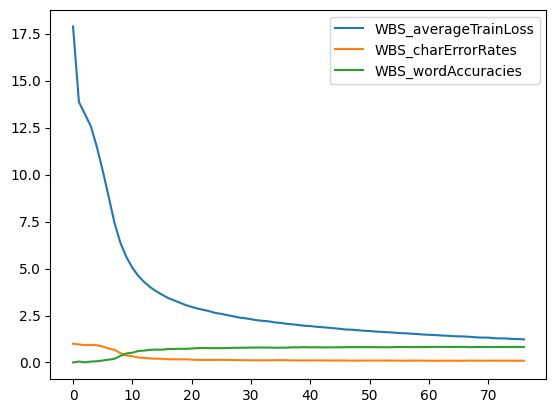

<Figure size 640x480 with 0 Axes>

In [ ]:
x={"averageTrainLoss": [17.881994874510045, 13.859197107079911, 13.222541482481239, 12.577249631489792, 11.491934658729868, 10.218887355229626, 8.836816715867553, 7.416034809530598, 6.35564698911693, 5.607546747547307, 5.045215861438072, 4.610038025738442, 4.282088171945859, 4.008258708535808, 3.7920003786478955, 3.6099829281846136, 3.4364809532688088, 3.3090015829425967, 3.18335322811179, 3.054613567378423, 2.957657673587538, 2.868249099548549, 2.7992100487016653, 2.728321813557246, 2.6336773780927265, 2.5881569908089834, 2.517619397542248, 2.459192743040111, 2.39283171418595, 2.3552674365370243, 2.30199066416858, 2.247268124802472, 2.217192319974507, 2.1886698056573737, 2.131160104111449, 2.106735294812346, 2.05997508356016, 2.0307997514123786, 1.9933209141639814, 1.953280600782943, 1.9393225679658863, 1.900490017786418, 1.8782965745011422, 1.8506786872262824, 1.8216714891668868, 1.789097594888243, 1.754364309245593, 1.7431700882846362, 1.7151992255694246, 1.6900401213397718, 1.673137031189383, 1.6466381876435998, 1.627086342197575, 1.6119944624704858, 1.591736333010948, 1.564392916143757, 1.553416763266472, 1.5329956093879595, 1.5148468523809355, 1.4889718669734588, 1.4726084568729139, 1.4606896426579723, 1.4369938863466865, 1.4244975406829625, 1.4007338024165532, 1.3916619901787746, 1.382813381822142, 1.362914699397675, 1.33792284090225, 1.325267349203972, 1.3232176630464318, 1.2911956816503447, 1.280839005561724, 1.2794696811127335, 1.2518880514249409, 1.2454083243461505, 1.231304554090108], "charErrorRates": [1.0, 0.9595105672969967, 0.9199110122358176, 0.9376195773081202, 0.9192880978865406, 0.8504115684093437, 0.745139043381535, 0.6722135706340379, 0.4981979977753059, 0.3692547274749722, 0.3356173526140156, 0.2623359288097887, 0.24373748609566184, 0.2135706340378198, 0.19804226918798665, 0.1975083426028921, 0.17276974416017798, 0.16689655172413792, 0.16404894327030034, 0.1684983314794216, 0.15150166852057842, 0.1385984427141268, 0.13681868743047831, 0.13730812013348165, 0.1350389321468298, 0.1406896551724138, 0.13664071190211347, 0.12956618464961067, 0.12453837597330367, 0.12088987764182425, 0.11666295884315907, 0.11737486095661846, 0.1163959955506118, 0.11830923248053393, 0.1214238042269188, 0.12449388209121245, 0.12093437152391547, 0.10865406006674082, 0.11203559510567297, 0.10634037819799777, 0.10945494994438265, 0.10602892102335928, 0.11021134593993326, 0.10433815350389321, 0.10665183537263627, 0.10433815350389321, 0.10669632925472748, 0.09664071190211346, 0.1014460511679644, 0.10113459399332592, 0.10122358175750834, 0.10304783092324805, 0.10309232480533927, 0.10420467185761957, 0.10100111234705228, 0.09543937708565073, 0.09494994438264738, 0.10055617352614016, 0.10042269187986652, 0.0978420467185762, 0.09317018909899889, 0.09081201334816463, 0.09379310344827586, 0.09695216907675194, 0.09530589543937709, 0.09299221357063404, 0.09272525027808676, 0.10122358175750834, 0.09499443826473859, 0.09454949944382647, 0.09690767519466073, 0.09744160177975528, 0.09646273637374861, 0.0967741935483871, 0.09383759733036708, 0.0939265850945495, 0.09245828698553948], "wordAccuracies": [0.0, 0.04994797086368366, 0.001734304543877905, 0.049427679500520294, 0.06451612903225806, 0.10596600763094, 0.14915019077349984, 0.19805757891085674, 0.3539715574054804, 0.47728061047519943, 0.5211585154353104, 0.6087408949011447, 0.6326742976066597, 0.670482136663198, 0.6873048907388137, 0.6805411030176899, 0.7160943461671869, 0.7212972597988206, 0.7292750607006591, 0.7242455775234131, 0.7433229275060701, 0.7650017343045439, 0.7681234824835241, 0.7601456815816857, 0.7651751647589317, 0.7615331252167881, 0.7674297606659729, 0.7807839056538328, 0.7830385015608741, 0.7852930974679153, 0.793097467915366, 0.7943114810960805, 0.7948317724592439, 0.7927506070065904, 0.785639958376691, 0.7863336801942421, 0.788935137010059, 0.8073187651751648, 0.8040235865417967, 0.8158168574401665, 0.8045438779049601, 0.8083593479014916, 0.8028095733610822, 0.8087062088102671, 0.8040235865417967, 0.8111342351716961, 0.812868539715574, 0.8191120360735346, 0.8151231356226153, 0.8166840097121054, 0.8175511619840444, 0.8144294138050642, 0.813735691987513, 0.8085327783558793, 0.8152965660770031, 0.8244883801595561, 0.8260492542490462, 0.8168574401664932, 0.8175511619840444, 0.8217134928893514, 0.8283038501560874, 0.8289975719736385, 0.8288241415192508, 0.8248352410683316, 0.8260492542490462, 0.8296912937911898, 0.829517863336802, 0.8132154006243496, 0.8231009365244537, 0.8274366978841484, 0.820326049254249, 0.8198057578910857, 0.8270898369753729, 0.8231009365244537, 0.8258758237946583, 0.8288241415192508, 0.8258758237946583]}
WBS = pd.DataFrame(x)
for i in WBS.columns:
  WBS.rename(columns = {i:'WBS_'+i}, inplace = True)
WBS.plot()
plt.show()
WBS
plt.savefig('Word_Beam_Search.png')

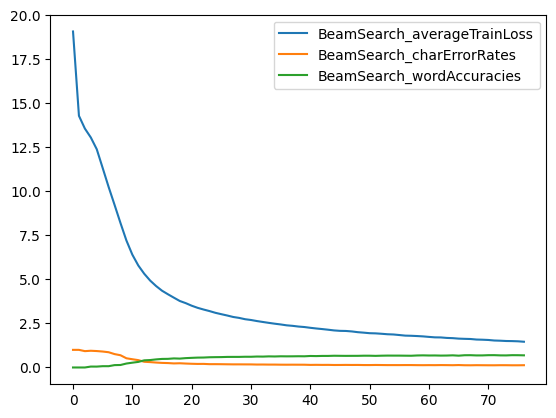

<Figure size 640x480 with 0 Axes>

In [ ]:
y={"averageTrainLoss": [19.072933073397035, 14.285057791957149, 13.561229387919107, 13.05504599323979, 12.389444633766457, 11.322790251837837, 10.248227649264866, 9.23227647498802, 8.200670357103702, 7.207953797446357, 6.403832391456321, 5.7910849076730235, 5.321939486044425, 4.933505817695901, 4.623408432360049, 4.357862163473059, 4.155362155702379, 3.9626181302247225, 3.7734423257686474, 3.6515986124674478, 3.5065538397541753, 3.3864720971496016, 3.289826348975853, 3.201904115853486, 3.102753992433901, 3.0248746077219644, 2.9491902457343206, 2.866463546399717, 2.8139762613508434, 2.7398724026150174, 2.6953255203035145, 2.6348969671461315, 2.582868147779394, 2.5323502311000117, 2.484851320584615, 2.4424668418036566, 2.392762479958711, 2.3637442147290266, 2.323037103370384, 2.2955753759101585, 2.252058603145458, 2.213551300543326, 2.180438174141778, 2.1436131088821977, 2.1033942257916487, 2.0791739048781217, 2.072500354713864, 2.0457156587530068, 2.0035118372352034, 1.9765839400114837, 1.9458318683836195, 1.9362399202805978, 1.9133688984093842, 1.8864308330747817, 1.8733179282259058, 1.8415627854841727, 1.808084578425796, 1.7995740042792425, 1.7841025568820812, 1.764438803549166, 1.7354861012211553, 1.709972165249012, 1.7050774936322812, 1.6776380229879309, 1.6649564813684534, 1.637951742719721, 1.6257860042430736, 1.6162346071667142, 1.5858187366414953, 1.5762952389540497, 1.5614299774169922, 1.5306913411175762, 1.5198045902782016, 1.5027501472720393, 1.497318047064322, 1.4857305773982294, 1.4607641873536286], "charErrorRates": [1.0, 0.9997775305895439, 0.9274304783092325, 0.9489655172413793, 0.9321913236929922, 0.9051390433815351, 0.865539488320356, 0.7598220244716352, 0.6946829810901001, 0.5223581757508342, 0.46763070077864294, 0.41713014460511677, 0.32422691879866516, 0.30491657397107896, 0.2799110122358176, 0.260111234705228, 0.2503670745272525, 0.23016685205784204, 0.23942157953281423, 0.22300333704115685, 0.21041156840934372, 0.20124582869855395, 0.203559510567297, 0.18816462736373749, 0.18878754171301446, 0.185761957730812, 0.18086763070077863, 0.17655172413793102, 0.17686318131256953, 0.17512791991101223, 0.17410456062291435, 0.16636262513904337, 0.16769744160177977, 0.163559510567297, 0.16369299221357064, 0.15862068965517243, 0.15706340378197997, 0.15870967741935485, 0.15737486095661846, 0.15635150166852058, 0.14651835372636263, 0.15016685205784205, 0.14629588431590657, 0.14780867630700778, 0.14095661846496108, 0.14206896551724138, 0.14576195773081202, 0.14242491657397108, 0.14389321468298108, 0.13775305895439377, 0.1370856507230256, 0.14238042269187987, 0.13882091212458286, 0.1350389321468298, 0.13517241379310344, 0.13477196885428253, 0.13726362625139044, 0.13690767519466074, 0.13241379310344828, 0.130055617352614, 0.13343715239154616, 0.13147942157953282, 0.1364182424916574, 0.1335706340378198, 0.12885428253615128, 0.13793103448275862, 0.12680756395995552, 0.12453837597330367, 0.13027808676307007, 0.1278754171301446, 0.12493882091212458, 0.12422691879866518, 0.12943270300333704, 0.12907675194660734, 0.12440489432703003, 0.12462736373748609, 0.12849833147942158], "wordAccuracies": [0.0, 0.0, 0.0, 0.051508844953173774, 0.050121401318071454, 0.07336108220603538, 0.07318765175164758, 0.13406174124176207, 0.14117238987166147, 0.2240721470690253, 0.2721123829344433, 0.31633714880332986, 0.404786680541103, 0.4216094346167187, 0.45855012140131807, 0.48508498092265, 0.48976760319112034, 0.5145681581685744, 0.5036420395421436, 0.5310440513354145, 0.5464793617759278, 0.5603537981269511, 0.5645161290322581, 0.5801248699271592, 0.5860215053763441, 0.5894901144640999, 0.5995490808185917, 0.600936524453694, 0.600936524453694, 0.6089143253555325, 0.6080471730835935, 0.6212278876170656, 0.6177592785293098, 0.6302462712452307, 0.6246964967048214, 0.634928893513701, 0.6318071453347208, 0.6335414498785987, 0.6380506416926812, 0.634928893513701, 0.6527922303156434, 0.6468955948664585, 0.6557405480402358, 0.6557405480402358, 0.6659729448491155, 0.6619840443981964, 0.6586888657648283, 0.6604231703087062, 0.6609434616718696, 0.6685744016649323, 0.6678806798473812, 0.6590357266736039, 0.6690946930280958, 0.6749913284772806, 0.6736038848421783, 0.6732570239334027, 0.6692681234824835, 0.66562608394034, 0.6817551161984045, 0.6878251821019771, 0.6800208116545265, 0.6822754075615678, 0.6744710371141173, 0.6781130766562609, 0.6893860561914672, 0.6699618453000347, 0.6949358307318765, 0.6971904266389178, 0.6841831425598335, 0.6850502948317725, 0.6980575789108567, 0.6994450225459591, 0.6869580298300382, 0.6847034339229969, 0.6984044398196323, 0.6966701352757544, 0.6888657648283039]}
BS=pd.DataFrame(y)
for i in BS.columns:
  BS.rename(columns = {i:'BeamSearch_'+i}, inplace = True)
BS.plot()
plt.show()
BS
plt.savefig('BeamSearch.png')

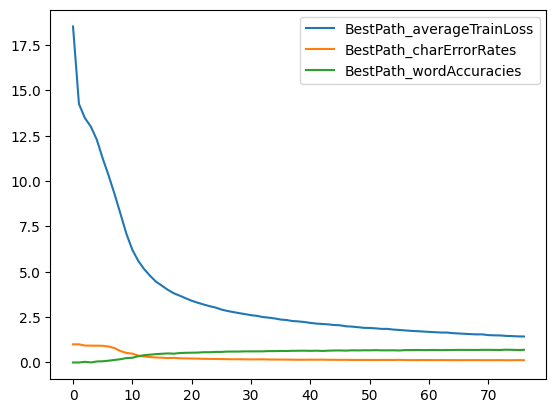

<Figure size 640x480 with 0 Axes>

In [ ]:
z={"averageTrainLoss": [18.519979971426505, 14.251753524497703, 13.474456504539207, 13.002567220617223, 12.289369812718144, 11.252753964176884, 10.30585405561659, 9.284985860188803, 8.193947297555429, 7.091367942315561, 6.209732002682156, 5.599815810168231, 5.139833132425944, 4.774659324575354, 4.449253338354605, 4.228120940702933, 3.999880486064487, 3.8108699630807945, 3.679560210969713, 3.538364613497699, 3.402151032730385, 3.2954200726968272, 3.1962884355474404, 3.104824432620296, 3.031034738929183, 2.9180798486427024, 2.8418388190092863, 2.7789778356198913, 2.720484111044142, 2.6651524746859514, 2.6068121415597423, 2.5712155059531883, 2.5032214367831194, 2.4714585454375655, 2.427125612894694, 2.3660275715368764, 2.3396436947363393, 2.283169313713356, 2.2636738883124456, 2.229667164661266, 2.1810334192381964, 2.144539689576184, 2.122384680642022, 2.101618448893229, 2.065534309104637, 2.049717739776329, 1.9947377619919953, 1.9773640720932573, 1.945957433294367, 1.9097859351723283, 1.902504806165342, 1.8809949270001165, 1.8518496994619016, 1.8521491554048326, 1.812922974427541, 1.791654560301039, 1.7658351946760107, 1.742669736897504, 1.724794990486569, 1.706439565729212, 1.6863081852595012, 1.6693164021880538, 1.651453779803382, 1.6499518707946494, 1.6170684651092246, 1.5984253662603873, 1.581277984159964, 1.562380834862038, 1.5484911821506642, 1.5493840818051938, 1.5084904653054696, 1.4964851450037073, 1.4904881561243977, 1.4646910671834592, 1.4547556219277558, 1.4377216299374898, 1.43133768108156, 1.4123103419939678, 1.398351377911038, 1.3781421846813626, 1.3591420672557972, 1.3712860367916249, 1.3472741290375039, 1.32926638479586], "charErrorRates": [1.0, 1.0, 0.9340600667408231, 0.9272080088987764, 0.9263626251390433, 0.9208898776418243, 0.8759065628476085, 0.7921690767519466, 0.6298553948832035, 0.5246718576195774, 0.48769744160177975, 0.37815350389321467, 0.3278309232480534, 0.30015572858731926, 0.27546162402669633, 0.2621134593993326, 0.24387096774193548, 0.25406006674082315, 0.23225806451612904, 0.22402669632925473, 0.21979977753058955, 0.21170189098998887, 0.20097886540600668, 0.1982202447163515, 0.19190211345939934, 0.18847608453837597, 0.18157953281423805, 0.17721913236929923, 0.17882091212458287, 0.17397107897664071, 0.17094549499443826, 0.17090100111234705, 0.17406006674082314, 0.1642714126807564, 0.16169076751946607, 0.16044493882091213, 0.15764182424916573, 0.15368186874304784, 0.15203559510567297, 0.1507007786429366, 0.15470522803114573, 0.15096774193548387, 0.15630700778642936, 0.14798665183537263, 0.1478976640711902, 0.14313681868743047, 0.14553948832035596, 0.13962180200222468, 0.1406451612903226, 0.13962180200222468, 0.13868743047830923, 0.1360622914349277, 0.13988876529477196, 0.14024471635150168, 0.13726362625139044, 0.14598442714126808, 0.13303670745272525, 0.13147942157953282, 0.1307230255839822, 0.13388209121245828, 0.13374860956618465, 0.12867630700778643, 0.133615127919911, 0.13054505005561734, 0.12996662958843158, 0.1274749721913237, 0.12921023359288097, 0.1282313681868743, 0.13063403781979976, 0.1278754171301446, 0.12596218020022246, 0.12840934371523915, 0.1296996662958843, 0.1239154616240267, 0.12444938820912124, 0.13018909899888764, 0.1257397107897664, 0.12347052280311457, 0.12186874304783092, 0.12387096774193548, 0.13165739710789767, 0.12734149054505006, 0.12311457174638488, 0.12658509454949946], "wordAccuracies": [0.0, 0.0, 0.03520638224072147, 0.002774887270204648, 0.05497745404092959, 0.06711758584807492, 0.09833506763787721, 0.13961151578217135, 0.17984738120013874, 0.24419007977800902, 0.2573707943114811, 0.34443288241415193, 0.4011446409989594, 0.4321886923343739, 0.46080471730835937, 0.480922650017343, 0.5, 0.48595213319458896, 0.5216788067984738, 0.5324314949705168, 0.5388484217828651, 0.5450919181408256, 0.5655567117585848, 0.5645161290322581, 0.5822060353798127, 0.5822060353798127, 0.6002428026361429, 0.6016302462712453, 0.6023239680887964, 0.6130766562608394, 0.6113423517169615, 0.6127297953520638, 0.614290669441554, 0.628338536246965, 0.625043357613597, 0.6378772112382934, 0.6323274366978842, 0.6432535553243149, 0.6472424557752341, 0.6494970516822755, 0.6416926812348248, 0.6505376344086021, 0.6361429066944155, 0.6507110648629899, 0.6607700312174818, 0.6628511966701353, 0.6533125216788068, 0.6701352757544224, 0.6649323621227887, 0.6722164412070759, 0.6703087062088102, 0.6801942421089143, 0.6696149843912591, 0.668921262573708, 0.6718695802983004, 0.660596600763094, 0.6836628511966701, 0.684530003468609, 0.6897329171002428, 0.6847034339229969, 0.6847034339229969, 0.6897329171002428, 0.6810613943808532, 0.6873048907388137, 0.6878251821019771, 0.6947624002774887, 0.6911203607353451, 0.692854665279223, 0.6892126257370794, 0.6959764134582033, 0.6971904266389178, 0.6918140825528963, 0.6892126257370794, 0.7039542143600416, 0.6977107180020812, 0.686264308012487, 0.6971904266389178, 0.700312174817898, 0.7029136316337149, 0.701179327089837, 0.6826222684703434, 0.693721817551162, 0.7046479361775928, 0.6963232743669788]}
BestPath=pd.DataFrame(z)
BestPath = BestPath.head(77)
for i in BestPath.columns:
  BestPath.rename(columns = {i:'BestPath_'+i}, inplace = True)
BestPath.plot()
plt.show()
BestPath
plt.savefig('BestPath.png')

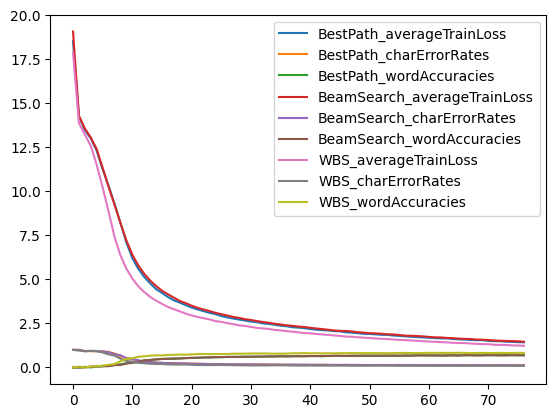

Index(['BestPath_averageTrainLoss', 'BestPath_charErrorRates',
       'BestPath_wordAccuracies', 'BeamSearch_averageTrainLoss',
       'BeamSearch_charErrorRates', 'BeamSearch_wordAccuracies',
       'WBS_averageTrainLoss', 'WBS_charErrorRates', 'WBS_wordAccuracies'],
      dtype='object')

In [ ]:
Summary = pd.concat([BestPath,BS,WBS], axis=1)
Summary.plot()
plt.show()
Summary.columns

In [ ]:
ATL = Summary[['BestPath_averageTrainLoss', 'BeamSearch_averageTrainLoss','WBS_averageTrainLoss']]
CER = Summary[['BestPath_charErrorRates', 'BeamSearch_charErrorRates','WBS_charErrorRates']]
WA = Summary[['BestPath_wordAccuracies', 'BeamSearch_wordAccuracies','WBS_wordAccuracies']]


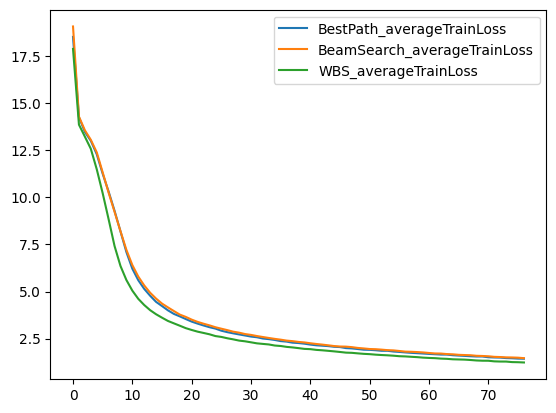

<Figure size 640x480 with 0 Axes>

In [ ]:
ATL.plot()
plt.show()
# BestPath
plt.savefig('Avg_Train_Loss.png')

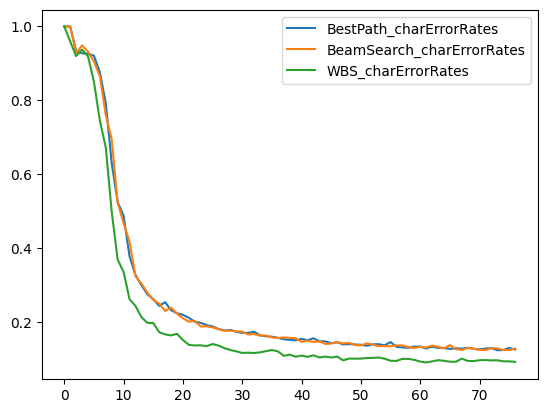

<Figure size 640x480 with 0 Axes>

In [ ]:
CER.plot()
plt.show()
# BestPath
plt.savefig('Chr_Err_Rate.png')

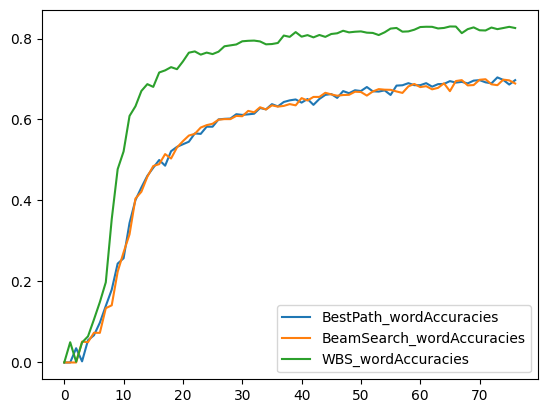

<Figure size 640x480 with 0 Axes>

In [ ]:
WA.plot()
plt.show()
# BestPath
plt.savefig('Word_Accuracy.png')